## TI3160TU: Natural Language Processing - Classification tasks Lab

In this hands-on lab, we will explore the basics of NLP classification tasks. We will demonstrate a simple application of Bag of Words representations and Naive Bayes classifier to solve an NLP classification task (e.g., Sentiment Analysis on movie reviews). Our classification task will comprise of the following steps:

0. **Collecting dataset from Kaggle**
1. **Preprocessing the raw dataset**
2. **Extracting Bag of Words representations from the preprocessed dataset** 
3. **Performing sentiment classification using Naive Bayes**
4. **Performance Considerations and Improvements**

## 0. Downloading and loading dataset from Kaggle 


We are going to use a dataset made available on Kaggle that consists of groundtruth data of movie reviews and their respective sentiment. The dataset is publicly and freely available here: https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis/

In [1]:
# import pandas to make our lives easier
import pandas as pd
pd.set_option('display.max_colwidth', 500)

# load the movie reviews dataset using Pandas
dataset = pd.read_csv('movie.csv')

# make sure that we do not have any duplicate entries in our dataset
dataset = dataset.drop_duplicates()

# lets inspect a few lines to see what we have
dataset.iloc[0:10]

,text,label
0,"I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ""Thunderbirds"" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thu...",0
1,"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those...",0
2,"Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with the Titanic sinking and you've got as realistic a flick as this formulaic soap opera populated entirely by low-life trash. Is this what kids who were too young to be allowed to go to Woodstock and who failed grade school composition do? ""I'll show those old meanies, I'll put out my own movie and pr...",0
3,"Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script is horrible. I did not get the point in mixing the story about Abraham and Noah together. So if you value your time and sanity stay away from this horror.",0
4,"Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re run of certain episodes, Man and the hour, Enemy within the gates, Battle School and numerous others with a different edge. Introduction of a new General instead of Captain Square was a brilliant move - especially when he wouldn't cash the cheque (something that is rarely done now).<br /><br />It f...",1
5,"A terrible movie as everyone has said. What made me laugh was the cameo appearance by Scott McNealy, giving an award to one of the murdered programmers in front of a wall of SUN logos. McNealy is the CEO of SUN Microsystem, a company that practically defines itself by its hatred of Microsoft. They have been instrumental in filing antitrust complaints against Microsoft. So, were they silly enough to think this bad movie would add fuel to that fire?<br /><br />There's no public record I see of...",0
6,"Finally watched this shocking movie last night, and what a disturbing mindf**ker it is, and unbelievably bloody and some unforgettable scenes, and a total assault on the senses. Looks like a movie from the minds of Lynch (specifically ERASERHEAD), Buttgereit, and even a little of ""Begotten"". What this guy does to his pregnant sister is beyond belief, but then again, did it really happen or is it his brain's left and right sides doing battle. That's the main theme of this piece of art, to dra...",1
7,"I caught this film on AZN on cable. It sounded like it would be a good film, a Japanese ""Green Card"". I can't say I've ever disliked an Asian film, quite the contrary. Some of the most incredible horror films of all time are Japanese and Korean, and I am a HUGE fan of John Woo's Hong Kong films. I an not adverse to a light hearted films, like Tampopo or Chung King Express (two of my favourites), so I thought I would like this. Well, I would rather slit my wrists and drink my own blood than w...",0
8,"It may be the remake of 1987 Autumn's Tale after eleven years, as the director

By inspecting the first few samples in our dataset, we observe that we have two columns:

- **text:** The movie review in text
- **label:** The groundtruth label on whether the movie review is positive or negative. 1 corresponds to positive reviews, while 0 corresponds to negative reviews

In [2]:
# lets check how many samples we have
print("Number of samples: All=%d Positive=%d Negative=%d" %(dataset.shape[0], dataset[dataset.label==1].shape[0], dataset[dataset.label==0].shape[0]))

Number of samples: All=39723 Positive=19908 Negative=19815


We observe that our dataset consists of 39K samples. It is also important to assess if our dataset is balanced or imbalanced. This is important as having an imbalanced dataset might affect the classification performance and generalizability of our classifier. Generally, we aim to have a balanced dataset so that the classifier can learn from a similar number of samples for each class. Here, we see that our dataset is balanced, given that we have 19K samples for positive reviews and 19 samples for negative reviews.


Now that we have loaded our dataset in memory, lets preprocess it!


## 1. Preprocessing the raw dataset

For the purposes of this simple classification task, we will preprocess the raw dataset using the following steps:
- Normalize text by converting everything to lowercase
- Remove punctuation, numbers, special characters, etc.
- Stem all the words

In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords
import nltk
nltk.download('stopwords', quiet=True)

# stop words from the NLTK library
stop_words = set(stopwords.words('english'))

# instatiate our Porter Stemmer that will help us stem our dataset
stemmer = PorterStemmer()

# method to preprocess our text
# INPUT: the raw text
# OUTPUT: the preprocessed text 
# (after performing normalization by converting everything to lowercase, removing punctuation and special chars, as well as stemming the words)
def preprocess_text(text):
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation, numbers, special characters, etc.
    text = re.sub('[^a-z]', ' ', text)
    
    # Remove stopwords and stem
    text = ' '.join(stemmer.stem(word) for word in text.split() if word not in stop_words)
    
    return text

# apply the preprocess_text method to all the entries in our dataframe. we apply the method on the "text" column and we store the output
# in a new column that we name "preprocessed_text"
dataset['preprocessed_text'] = dataset['text'].apply(preprocess_text)

## 2. Extracting Bag of Words representations from the preprocessed dataset 

Having preprocessed our dataset, the next step in a traditional NLP classifier, is to perform **feature extraction**. Feature extraction aim to convert the preprocessed textual dataset into features that can directly be used for classification purposes (i.e., convert text to numerical features that will be used by a classifier to, in this case, determine if a movie review is positive or negative).

For the purposes of this lab, we will use the simplest feature extraction method, which is a method called **Bag of Words (BoW) representations.** BoW representations essentially represent each document (in this case each movie review) as an unordered collection of words (does not consider word order and grammar but takes into account how many times each word appears in each document).

For extracting BoW representations, we will use the Sklearn library. It has readily available methods to convert a corpus of text into a multidimensional array corresponding to BoW representations. In this multidimensional matrix, each row corresponds to a sample, while columns correspond to specific words that appear in our corpus. The numbers in each cell, correspond to the number of times a word appears in the document.

In [4]:
# Import the CountVectorizer method, which is the one we will use for generating our Bag of Words representaion
from sklearn.feature_extraction.text import CountVectorizer

# instatiate our BoW vectorizer (here we use all the default parameters)
# we will demonstrate some of the parameters later in this lab
vectorizer = CountVectorizer()

# here, we extract our BoW array. This will be the input to our classifier
X = vectorizer.fit_transform(dataset['preprocessed_text']).toarray()

# lets also store the groundtruth labels to a Y variable 
y = dataset['label']

In [5]:
# lets inspect this X array (BoW representations)
print("Shape of the X array =%s" %(str(X.shape)) )

Shape of the X array =(39723, 62647)


Our BoW array comprises of 39K rows and 62K columns. The rows are 39K because we have 39K samples in our dataset. But, how did we end up with 62K columns? 

We have 62K columns because we have 62K unique words in our dataset. In the BoW representations we treat each word as a separate feature.

Lets see how we can extract information of what is each feature in this BoW array

In [6]:
# lets see what each column corresponds to
# the CountVectorizer holds in the vocabulary_ attribute information about the features after we run the fit_transform method
features_mapping = vectorizer.vocabulary_

# lets see some examples of what this mapping includes 
# here we print the first two keys and values that exist in this dictionary (we show an example since the dictionary is huge!)
dict(list(features_mapping.items())[0:2])

{'grew': 22611, 'watch': 60118}

**This means that column 22611 in our BoW matrix correspond to the word "grew", while column 60118 corresponds to the word "watch".**

### 2.1 Reducing the number of features in BoW representations

 In general, when performing NLP classification tasks we aim to reduce the number of features (i.e., 62K is a very large number of features). How can we reduce the number of features in BoW representations?

*The main idea is to focus on the most important words in our dataset. How we assess importance? Well, we can focus on the most occuring words in our dataset, as they are more likely to be more informative. E.g., if a word appears to only a document or only once it will not be very informative for our NLP classification task. Lets see how we can do this with sklearn. We will use the top 10K words.*

In [7]:
# instatiate our BoW vectorizer (here we want to extract 10K features, so we will focus only on the top 10K most occurring words in our dataset)
vectorizer = CountVectorizer(max_features=10000)

# here, we extract our BoW array. This will be the input to our classifier
X = vectorizer.fit_transform(dataset['preprocessed_text']).toarray()

In [8]:
print("Shape of the X array = %s" %(str(X.shape)))

Shape of the X array = (39723, 10000)


In [9]:
features_mapping = vectorizer.vocabulary_
dict(list(features_mapping.items())[0:2])

{'grew': 3827, 'watch': 9684}

Observations with the new CountVectorizer (10K features)

- We reduced the number of features by considering only the top 10K words based on their occurrences in the entire corpus
- The feature indices changed from before. Now, column 3827 corresponds to the word "grew" and column 9684 corresponds to the word "watch"

**Now, having converted our textual dataset into BoW numerical representations, lets perform our classification task using a Naive Bayes classifier**

## 3. Performing sentiment classification using Naive Bayes

### 3.1 Splitting data into train and test sets

Before training our classifier, we need to split our dataset into **training** and **test** sets. The classifier will be trained using only the training dataset. We use the test set to evaluate the performance of our classifier in an unseen data. We always need to evaluate the performance to unseen samples, as the classifier has already seen the training dataset and the ground truth labels of the training dataset.

In [10]:
# Sklearn has a readily available method for splitting the dataset into training and test sets
# it randomly splits the data into test and training sets. We do this for both X (BoW representations) and Y (groundtruth labels).
from sklearn.model_selection import train_test_split

# test_size indicates what proportion of the dataset should be included in the test set. Here, we use 20% of the corpus as the test set 
# (the rest 80% is used for training)
#random_state is used to ensure that multiple runs of this method will have the same result 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

### 3.2 Training the Naive Bayes Classifier

Now that we have a training and test set, we will train our classifier.

In [11]:
# we import the Multinomial Naive Bayes implementation from Sklearn
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

# we train our Naive Bayes classifier. Note that here we only use the training set.
classifier.fit(X_train, y_train)

MultinomialNB()

### 3.3 Evaluating Classifier 

Now that we have trained our classifier, we aim to evaluate how well our classifier can predict whether movie reviews are positive or negative. To do this, we will use the test set and calculate standard classification metrics such as accuracy, precisio, recall, and f1-score).

In [12]:
# sklearn has readily available methods to calculate classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# first we use the classifier to make predictions with all the samples that are included in the test set
y_pred = classifier.predict(X_test)

#then, we compare the predicted labels with the ground truth labels to calculate the accuracy, precision, recall, and f1_score of our classifer
print("Accuracy: %.3f" %(accuracy_score(y_test, y_pred)))
print("Precision: %.3f" %(precision_score(y_test, y_pred)))
print("Recall: %.3f" %(recall_score(y_test, y_pred)))
print("F1-Score: %.3f" %(f1_score(y_test, y_pred)))

Accuracy: 0.845
Precision: 0.849
Recall: 0.838
F1-Score: 0.843


We observe that with these very simple representation (BoW) and classifier (Naive Bayes), we can achieve good performance. The classifier achieves an accuracy of 84.5% and an F1-score of 0.843.

In [13]:
# we can also visualize the results using a Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3401,  590],
       [ 640, 3314]])

The confusion matrix is another view of the performance of the classifier. In this matrix, the rows correspond to the actual classes (negative/positive) while the columns correspond to the predicted classes from the classifier. In these specific results, 3401 samples in the dataset are correctly predicted as being negative, while 590 are wrongfully predicted as positive while their groundtruth label is negative. Similarly, 3314 are correcly predicted as being positive, while 640 samples are predicted as being negative, while in reality they are positive.

### 3.4 Making predictions 


Now that we have a trained and evaluated Naive Bayes classifier, how do we make predictions to new uneseen reviews? 

Lets assume that we have a new review in text, what steps do we need to take to classify it to either positive and negative review?

To make new predictions, we need to follow all the steps that we did for the corpus. Specifically:
    
1. Preprocess the new review using the same methodology as before
2. Use the already fitted CountVectorizer to convert the text a BoW representation. **Note that we need to use the same CountVectorizer instance, as we want to use the same features as the ones we used for training our classifier.**
3. After obtaining the BoW representaiton, we use the already trained Naive Bayes Classifier to make predictions and classify the new review as either positive or negative

In [14]:
# this is the new review that we want to classify
new_review = "I really disliked the plot and the characters."

# 1. Preprocess the new review using the same method as before
cleaned_review = preprocess_text(new_review)

# 2. Use the already trained vectorizer to transform the text into BoW representation
new_review_features = vectorizer.transform([cleaned_review]).toarray()

# 3. Use the already trained Naive Bayes classifier to extract the probabilities for each class
predicted_sentiment = classifier.predict_proba(new_review_features)

# output the probabilities for each class
predicted_sentiment

array([[0.71312735, 0.28687265]])

In this output, each number correspond to the probability of each class. That is, the classifier predicts with a probability of 0.71 that the new review is negative and a probability of 0.28 that the new review is positive. So the classifier will take the higher probability and essentially predicts that the new review is negative.

### 4. **Performance Considerations and Improvements**

All three steps and decisions we made in this lab, are likely to affect the performance of the classifier. Particularly:

- The way we preprocess the dataset
- The feature extraction method (BoW) and the number of features that we used
- The selection of the classifier (Naive Bayes)

If we aim to improve the performance of the classifier, we can tweak or change some of these components. Potential improvements include: 
1. Change the number of features in BoW 
2. Use a totally different feature extraction technique (more on this later in the course)
3. Use a different classifier (e.g., Decision Tree, Random Forest, etc.)

For the purposes of this lab, lets focus on points 1 and 3 above.

## 4.1 Changing the number of features in BoW

Here, we aim to assess if we can improve the performance of our Naive Bayes classifier by tweaking the number of features in our BoW representations. We will change the CountVectorizer definition with varying number of features, retrain the classifier, and evaluate the performance to figure out how changing the number of features affects the performance.

In [15]:
num_samples = [1000, 5000, 10000, 20000, 30000, 40000, 50000, 60000]

accuracies = []
precisions = []
recalls = []
f1_scores = []

for num in num_samples:
    
    # instatiate our BoW vectorizer
    vectorizer_num_samples = CountVectorizer(max_features=num)

    # here, we extract our BoW array. This will be the input to our classifier
    X = vectorizer_num_samples.fit_transform(dataset['preprocessed_text']).toarray()
    
    # split the dataset
    # defining random_state is important here as we aim to re-run this multiple times so we want to keep the same split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
    
    # we train our Naive Bayes classifier. Note that here we only use the training set.
    my_classifier = MultinomialNB()
    my_classifier.fit(X_train, y_train)
    
    # first we use the classifier to make predictions with all the samples that are included in the test set
    my_y_pred = my_classifier.predict(X_test)

    #then, we compare the predicted labels with the ground truth labels to calculate the accuracy, precision, recall, and f1_score of our classifer
    accuracies.append(accuracy_score(y_test, my_y_pred))
    precisions.append(precision_score(y_test, my_y_pred))
    recalls.append(recall_score(y_test, my_y_pred))
    f1_scores.append(f1_score(y_test, my_y_pred))
    

Lets plot how the performance changes with the number of BoW features. We visualize the F1 score for varying number of BoW features

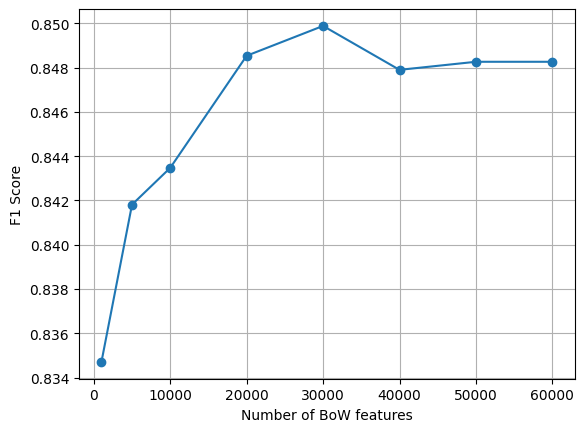

In [16]:
import matplotlib.pyplot as plt

# Create the line plot
plt.plot(num_samples, f1_scores, marker='o', linestyle='-')

# Customize the plot
plt.xlabel("Number of BoW features")
plt.ylabel("F1 Score")
plt.grid(True)

# Display the plot
plt.show()

We observe that there is a slight imporvement in performance until 30K features and then we have a slight descrease. For the rest of our experimentation we will use 30K for BoW features.

## 4.2 Using different classifiers for Sentiment Classification

Here, we will test how the performance changes when we use a classifier other than Naive Bayes. For our experimentation in this lab, we will play with some other traditional Machine Learning classifiers, particularly, Decision Tree and Random Forest.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# instatiate our BoW vectorizer with 30K
vectorizer = CountVectorizer(max_features=30000)

# here, we extract our BoW array. This will be the input to our classifier
X = vectorizer.fit_transform(dataset['preprocessed_text']).toarray()

# split the dataset
# defining random_state is important here as we aim to re-run this multiple times so we want to keep the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes Classifier
print("Training a Naive Bayes Classifier...")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Train a Decision Tree Classifier
print("Training a Decision Tree Classifier...")
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Train a Random Forest classifier
print("Training a Random Forest Classifier...")
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

Training a Naive Bayes Classifier...
Training an SVM Classifier...


In [ ]:
classifiers = {
    'Naive Bayes': nb_classifier,
    'Decision Tree': dt_classifier,
    'Random Forest': rf_classifier
}

# Calculate F1-Scores for each classifier
f1_scores = {}
for name, classifier in classifiers.items():
    y_pred = classifier.predict(X_test)
    f1_scores[name] = f1_score(y_test, y_pred)

# Plotting
names = list(f1_scores.keys())
values = list(f1_scores.values())

plt.figure(figsize=(6, 4))
plt.bar(names, values, color=['blue', 'green', 'red', 'cyan'])
plt.ylabel('F1-Score')
plt.ylim(0, 1)  # Assuming F1-Score range is between 0 and 1
plt.show()

We observe that Random Forest performs slightly better than Naive Bayes in terms of F1 score (improvement of 0.01. Decision tree performs substantially worse. Overall, the selection of the classifier affects the performance so in many cases we try various classifiers and select the one that performs better.

**Note that we did not went in depth on hyperparameter tuning for the Decision Tree and Random Forest classifiers. In a realistic scenario, we perform Grid Search to find the optimal set of hyperparameters and we use the ones that provide the best performance.**

## **Exercise: Augment the dataset and observe how the increased data size affects the performance of each classifier. What do you observe when you have an imbalanced dataset?**

The goal of this exercise is to play with the data and the classifiers to understand how the size of the dataset affects the performance of the classifiers. Try to train classifiers using a subset of the original dataset (e.g., 20%, 40%, 60%, 80%) to observe how the performance of these classifiers change. Also, try to create an imbalanced dataset to see how the performance is affected (e.g., instead of 50% positive and 50% negative sample, create a subset of the dataset where 80% are positive and 20% are negative).

In [ ]:
# Insert your code here:

## TI3160TU: Natural Language Processing - Classification Tasks Lab -- END